In [1]:
import sys
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd "drive/MyDrive/Colab Notebooks/mandelbrot-torch"
sys.path.append("/content/drive/MyDrive/Colab Notebooks/mandelbrot-torch")

import torch
import matplotlib.pyplot as plt
from matplotlib import colormaps
from mandel import mandel
import time
torch.cuda.is_available()

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/mandelbrot-torch


True

In [2]:
tic_cpu = time.time()
out_cpu = mandel(device=torch.device('cpu'))
toc_cpu = time.time()

tic_cuda = time.time()
out_cuda = mandel(device=torch.device('cuda'))
toc_cuda = time.time()

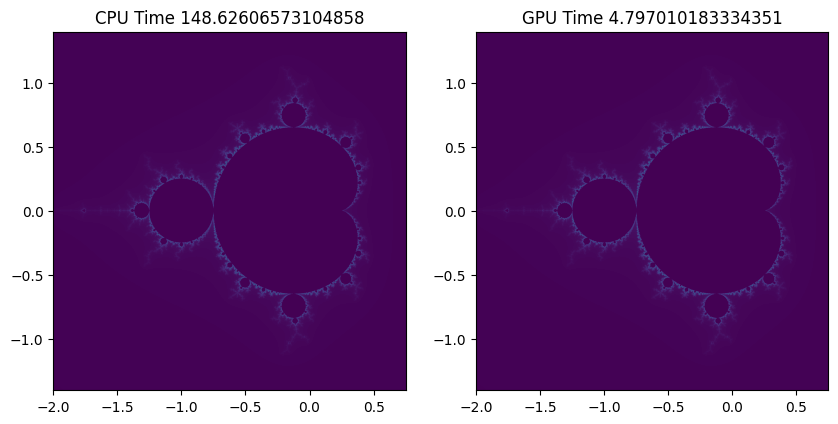

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(10,10))

ax[0].set_title(f'CPU Time {toc_cpu-tic_cpu}')
ax[0].imshow(out_cpu, extent=(-2,0.75,-1.4,1.4))
ax[1].set_title(f'GPU Time {toc_cuda-tic_cuda}')
ax[1].imshow(out_cuda, extent=(-2,0.75,-1.4,1.4));

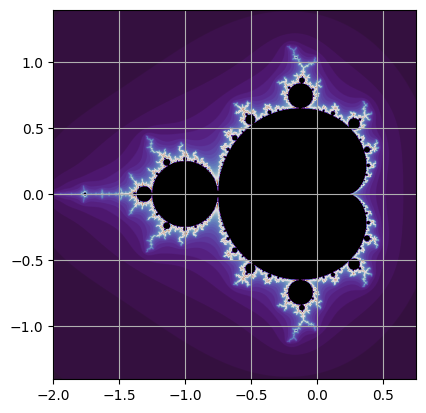

In [4]:
out = torch.remainder(out_cuda, 50)

cols = colormaps.get_cmap('twilight_shifted')
cols.set_under(color='black')
plt.imshow(out, cmap=cols, vmin=1, extent=(-2,0.75,-1.4,1.4))
plt.grid();

In [7]:
dev = torch.device('cuda')
out = []
window = [(-1.5,-1,0,0.5),
          (-1.2,-1.15,0.3,0.35),
          (-1.2,-1.19,0.31,0.32),
          (-0.76,-0.72,-0.16,-0.12)]

for view in window:
  out.append( torch.remainder( mandel(device=dev, limits=view),50 ) )

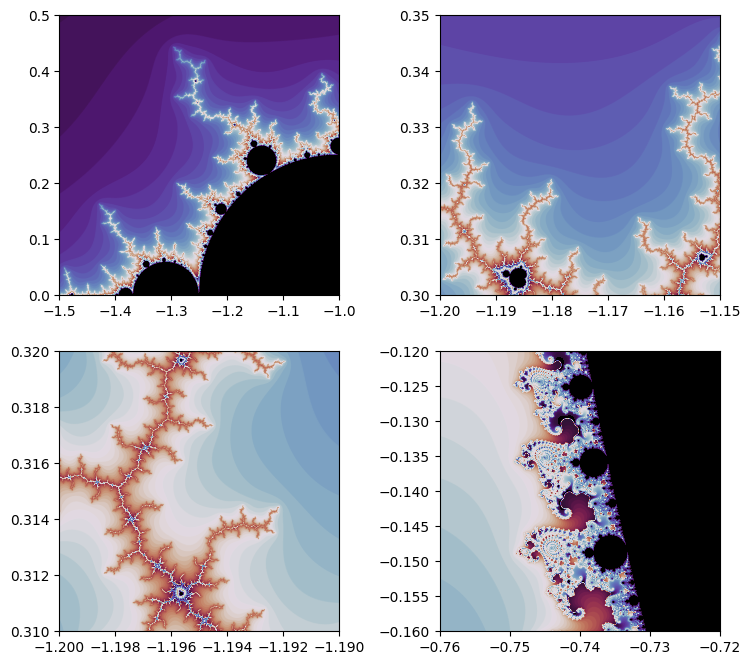

In [22]:
fig,ax = plt.subplots(ncols=2, nrows=2, figsize=(9,8))
ax = ax.flatten()
for i,x in enumerate(ax):
  x.imshow(out[i], cmap=cols, vmin=1, extent=window[i])

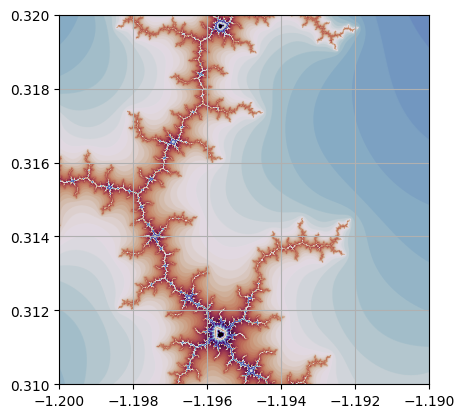

In [9]:
dev = torch.device('cuda')

window = (-1.2,-1.19,0.31,0.32)

limits, out = mandel(device=dev, limits=window)
out = torch.remainder(out,50)
cols = colormaps.get_cmap('twilight_shifted')
cols.set_under(color='black')
plt.imshow(out, cmap=cols, vmin=1, extent=limits)
plt.grid();

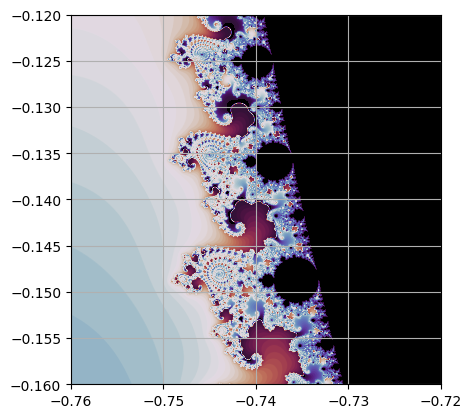

In [12]:
dev = torch.device('cuda')

window = (-0.76,-0.72,-0.16,-0.12)

limits, out = mandel(device=dev, limits=window)
out = torch.remainder(out,50)
cols = colormaps.get_cmap('twilight_shifted')
cols.set_under(color='black')
plt.imshow(out, cmap=cols, vmin=1, extent=limits)
plt.grid();